<a href="https://colab.research.google.com/github/armanalam6342/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls")

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [ ]:
len(columns)

24

In [ ]:
df.shape

(30001, 24)

In [ ]:
a=list(df.iloc[0])

In [ ]:
df.set_axis(columns, axis=1, inplace=True)

In [ ]:
df=df.drop(0,axis=0).reset_index()

In [ ]:
df.head()

,index,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            30000 non-null  object
 1   Gender               30000 non-null  object
 2   Education            30000 non-null  object
 3   Marital_status       30000 non-null  object
 4   Age                  30000 non-null  object
 5   Repayment_September  30000 non-null  object
 6   Repayment_August     30000 non-null  object
 7   Repayment_July       30000 non-null  object
 8   Repayment_June       30000 non-null  object
 9   Repayment_May        30000 non-null  object
 10  Repayment_April      30000 non-null  object
 11  Sep_Bill             30000 non-null  object
 12  Aug_Bill             30000 non-null  object
 13  July_Bill            30000 non-null  object
 14  June_Bill            30000 non-null  object
 15  May_Bill             30000 non-null  object
 16  Apr_

In [ ]:
df.duplicated().sum()

35

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Limit_bal              0
Gender                 0
Education              0
Marital_status         0
Age                    0
Repayment_September    0
Repayment_August       0
Repayment_July         0
Repayment_June         0
Repayment_May          0
Repayment_April        0
Sep_Bill               0
Aug_Bill               0
July_Bill              0
June_Bill              0
May_Bill               0
Apr_Bill               0
Pay_Sep                0
Pay_Aug                0
Pay_July               0
Pay_June               0
Pay_May                0
Pay_April              0
Defaulter              0
dtype: int64

In [ ]:
for i in df.columns:
  df[i]=df[i].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Limit_bal            29965 non-null  int64
 1   Gender               29965 non-null  int64
 2   Education            29965 non-null  int64
 3   Marital_status       29965 non-null  int64
 4   Age                  29965 non-null  int64
 5   Repayment_September  29965 non-null  int64
 6   Repayment_August     29965 non-null  int64
 7   Repayment_July       29965 non-null  int64
 8   Repayment_June       29965 non-null  int64
 9   Repayment_May        29965 non-null  int64
 10  Repayment_April      29965 non-null  int64
 11  Sep_Bill             29965 non-null  int64
 12  Aug_Bill             29965 non-null  int64
 13  July_Bill            29965 non-null  int64
 14  June_Bill            29965 non-null  int64
 15  May_Bill             29965 non-null  int64
 16  Apr_Bill             2

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Limit_bal,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
Gender,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
Education,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
Marital_status,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
Age,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
Repayment_September,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
Repayment_August,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
Repayment_July,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
Repayment_June,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
Repayment_May,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


In [ ]:
# sns.pairplot(df)

In [ ]:
def outliers(feature):
  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  plt.hist(df[feature],alpha=0.5)

  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[feature])
  plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


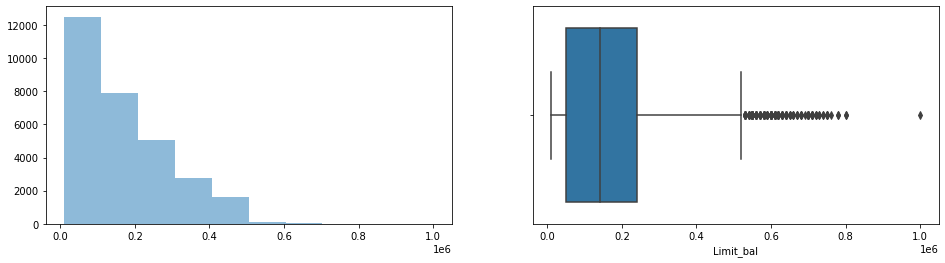

In [ ]:
outliers('Limit_bal')

In [ ]:
df.loc[df['Limit_bal']>500000,'Limit_bal']=500000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


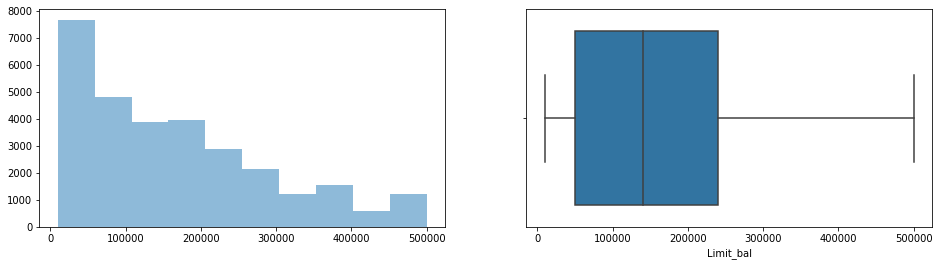

In [ ]:
outliers('Limit_bal')

In [ ]:
df.columns

Index(['Limit_bal', 'Gender', 'Education', 'Marital_status', 'Age',
       'Repayment_September', 'Repayment_August', 'Repayment_July',
       'Repayment_June', 'Repayment_May', 'Repayment_April', 'Sep_Bill',
       'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill', 'Pay_Sep',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April', 'Defaulter'],
      dtype='object')

In [ ]:
df['Gender'].value_counts()

2    18091
1    11874
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


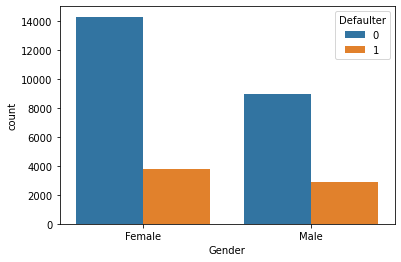

In [ ]:
sns.countplot(df['Gender'],hue=df['Defaulter'])

In [ ]:
df.Gender.value_counts()

Female    18091
Male      11874
Name: Gender, dtype: int64

In [ ]:
df[df.Defaulter==1].Gender.value_counts(normalize =True)

Female    0.56727
Male      0.43273
Name: Gender, dtype: float64

In [ ]:
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
df['Education'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


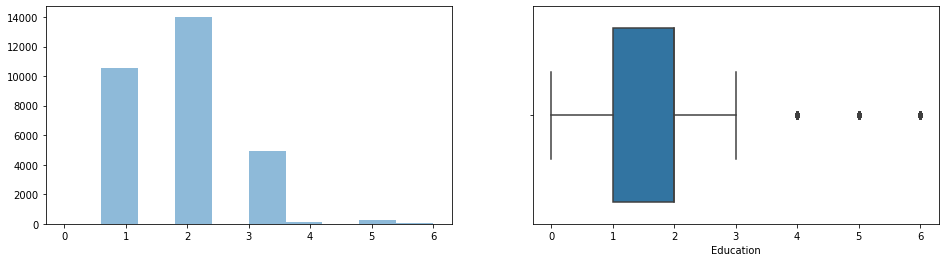

In [ ]:
outliers('Education')

In [ ]:
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


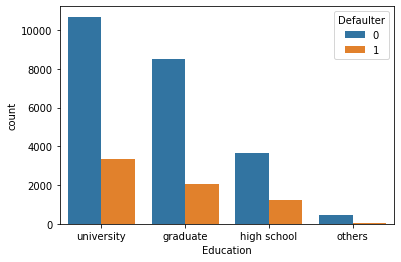

In [ ]:
sns.countplot(df['Education'],hue=df.Defaulter)

In [ ]:
df[df.Defaulter == 1].Education.value_counts(normalize=True)

university     0.501961
graduate       0.306486
high school    0.186576
others         0.004977
Name: Education, dtype: float64

In [ ]:
#Marital status (1 = married; 2 = single; 3 = others).
df['Marital_status'].value_counts()

2    15945
1    13643
3      323
0       54
Name: Marital_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


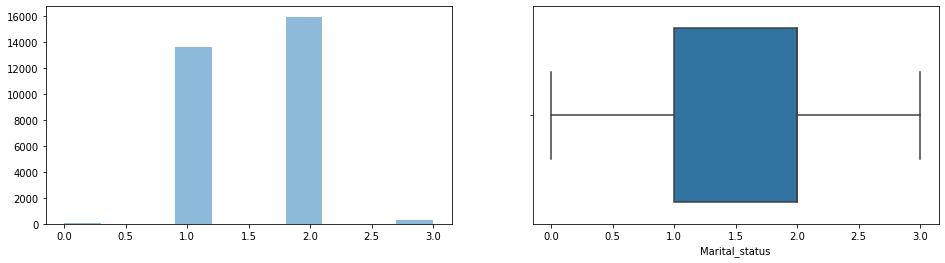

In [ ]:
outliers('Marital_status')

In [ ]:
df['Marital_status']=df['Marital_status'].apply(lambda x : "married" if x==1 else ("single" if x==2 else 'others'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marital status with respect of Defaulter or not')

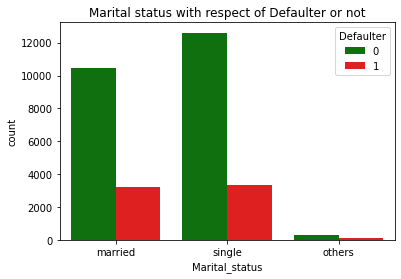

In [ ]:
sns.countplot(df['Marital_status'],hue=df.Defaulter,palette=["green", "red"]).set_title('Marital status with respect of Defaulter or not')

In [ ]:
df[df.Defaulter==1].Marital_status.value_counts(normalize=True)

single     0.503771
married    0.482805
others     0.013424
Name: Marital_status, dtype: float64

In [ ]:
df.Age.value_counts().sort_index()

21      67
22     560
23     930
24    1126
25    1185
26    1252
27    1475
28    1406
29    1602
30    1394
31    1213
32    1157
33    1146
34    1161
35    1113
36    1107
37    1041
38     943
39     951
40     870
41     822
42     792
43     669
44     700
45     617
46     570
47     501
48     466
49     449
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


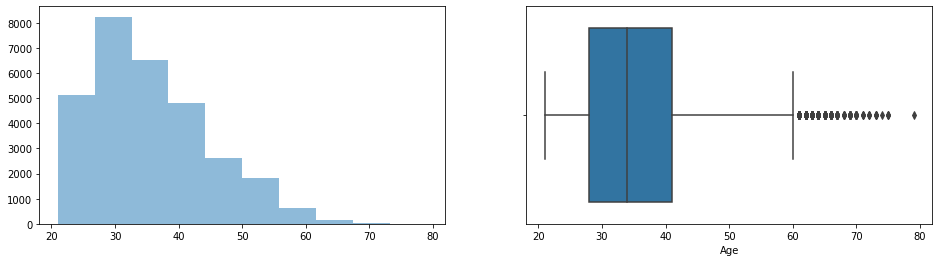

In [ ]:
outliers('Age')

In [ ]:
df['Age_Group']=pd.cut(df.Age, bins=[21,30,40,50,60,100], labels=['21-30','31-40','41-50','51-60','60+'])

In [ ]:
df[['Age','Age_Group']].sample(10)

,Age,Age_Group
124,27,21-30
6326,35,31-40
5835,26,21-30
7712,34,31-40
28298,31,31-40
29197,24,21-30
23571,44,41-50
24248,31,31-40
21509,23,21-30
3174,23,21-30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


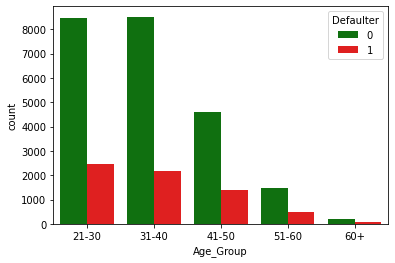

In [ ]:
sns.countplot(df['Age_Group'],hue=df['Defaulter'],palette=['green','red'])

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [ ]:
df.columns

Index(['Limit_bal', 'Gender', 'Education', 'Marital_status', 'Age',
       'Repayment_September', 'Repayment_August', 'Repayment_July',
       'Repayment_June', 'Repayment_May', 'Repayment_April', 'Sep_Bill',
       'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill', 'Pay_Sep',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April', 'Defaulter',
       'Age_Group'],
      dtype='object')

In [ ]:
df['Repayment_September'].value_counts()

 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_September, dtype: int64

In [ ]:
def pay(delay):
    if delay <= 0:
      return 0
    elif delay >= 3:
      return 3
    else:
      return delay

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Limit_bal            29965 non-null  int64   
 1   Gender               29965 non-null  object  
 2   Education            29965 non-null  object  
 3   Marital_status       29965 non-null  object  
 4   Age                  29965 non-null  int64   
 5   Repayment_September  29965 non-null  int64   
 6   Repayment_August     29965 non-null  int64   
 7   Repayment_July       29965 non-null  int64   
 8   Repayment_June       29965 non-null  int64   
 9   Repayment_May        29965 non-null  int64   
 10  Repayment_April      29965 non-null  int64   
 11  Sep_Bill             29965 non-null  int64   
 12  Aug_Bill             29965 non-null  int64   
 13  July_Bill            29965 non-null  int64   
 14  June_Bill            29965 non-null  int64   
 15  May_Bill           

In [ ]:
for i in df.columns[5:11]:
  print(i)
  df[i]=df[i].apply(pay)

Repayment_September
Repayment_August
Repayment_July
Repayment_June
Repayment_May
Repayment_April


In [ ]:
df.sample(5)

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Age_Group
14983,350000,Male,graduate,single,30,0,0,0,0,0,0,18265,31619,2071,2915,1011,23620,16158,2081,2929,1016,23738,919,0,21-30
541,150000,Female,graduate,single,28,1,0,0,0,0,0,0,0,0,0,0,318,0,0,0,0,318,0,0,21-30
22674,150000,Female,university,single,31,0,0,0,0,0,0,138363,138979,37713,35592,35808,36730,6000,2000,2000,1300,1500,1500,0,31-40
29571,500000,Male,graduate,single,33,0,0,0,0,0,0,388897,253793,261176,266800,0,0,9083,11472,12000,0,0,0,0,31-40
27955,140000,Female,university,married,27,2,0,0,0,0,0,776,752,776,1580,804,728,752,800,1580,0,700,700,0,21-30


In [ ]:
df['Repayment_September'].value_counts()

0    23169
1     3667
2     2666
3      463
Name: Repayment_September, dtype: int64

In [ ]:
df.drop(columns='Age',inplace=True)

In [ ]:
df['Defaulter'].value_counts()

0    23335
1     6630
Name: Defaulter, dtype: int64

In [ ]:
# #Multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def calc_vif(X):
 
#    # Calculating VIF
#    vif = pd.DataFrame()
#    vif["variables"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
#    return(vif)

In [ ]:
# # using seaborn heatmap for ploting correlation graph 
# plt.figure(figsize=(15,10))
# sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [ ]:
# calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT5','BILL_AMT3','BILL_AMT2','BILL_AMT6']]])

In [ ]:
# vif_df=df.drop(columns=['BILL_AMT5','BILL_AMT3','BILL_AMT2','BILL_AMT6'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Limit_bal            29965 non-null  int64   
 1   Gender               29965 non-null  object  
 2   Education            29965 non-null  object  
 3   Marital_status       29965 non-null  object  
 4   Repayment_September  29965 non-null  int64   
 5   Repayment_August     29965 non-null  int64   
 6   Repayment_July       29965 non-null  int64   
 7   Repayment_June       29965 non-null  int64   
 8   Repayment_May        29965 non-null  int64   
 9   Repayment_April      29965 non-null  int64   
 10  Sep_Bill             29965 non-null  int64   
 11  Aug_Bill             29965 non-null  int64   
 12  July_Bill            29965 non-null  int64   
 13  June_Bill            29965 non-null  int64   
 14  May_Bill             29965 non-null  int64   
 15  Apr_Bill           

In [ ]:
new_df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.describe()

,Limit_bal,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,166765.549141,0.346671,0.311330,0.293976,0.245753,0.209411,0.215852,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,127594.383724,0.705093,0.757083,0.735092,0.682570,0.639627,0.645261,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,500000.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
new_df.head()

,Limit_bal,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Gender_Male,Education_high school,Education_others,Education_university,Marital_status_others,Marital_status_single,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_60+
0,20000,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,120000,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,1,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,0,0,1,0,0,0
4,50000,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X =new_df.drop(columns=['Defaulter'])
y =new_df['Defaulter']

In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 29965
Resampled dataset shape 46670


In [ ]:
from sklearn.model_selection import train_test_split